In [1]:
setwd('/import/jliu/data2/')

In [2]:
load('./data.new.rda')

In [3]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
library(dplyr)

In [5]:
exp = nn %>%  dplyr::filter(Type == 1) %>%  dplyr::select(c('FAM200B','BCL2A1','IGJ','TXN')) %>%  t()

In [6]:
exp

,CI10,CI11,CI12,CI13,CI14,CI15,CI16,CI17,CI18,CI19,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
FAM200B,7.979635,6.76577,5.766998,7.270609,10.29968,11.39322,4.416411,7.394873,9.066759,5.896391,...,9.958869,7.458542,6.550235,8.440013,6.779319,5.316711,5.308183,7.384616,5.66429,10.59585
BCL2A1,57.437502,70.39380,17.797187,44.295267,90.07335,62.81435,48.922249,45.458879,211.325099,40.961295,...,54.632002,76.292959,60.512074,36.118077,20.798318,15.517720,10.770557,14.941199,26.33379,126.50607
IGJ,58.695609,57.28000,54.576002,10.617595,103.74240,90.13937,50.433702,16.859883,44.647170,61.077122,...,81.284090,162.292896,27.617752,30.499533,24.753933,23.522615,116.628108,15.496157,121.20885,135.34957
TXN,31.102072,25.80071,19.669212,28.524780,27.75964,34.42480,20.917019,22.850366,57.238551,21.444865,...,44.304537,28.532852,19.477687,15.238177,16.912287,13.464847,9.500395,12.528221,19.55637,37.88605


In [7]:
library(ConsensusClusterPlus)

Warning message:
"package 'ConsensusClusterPlus' was built under R version 4.2.2"


In [51]:
library(NMF) 

con <- ConsensusClusterPlus(exp, #矩阵形式
                            maxK=10, #最大聚类簇数量
                            reps=100, #抽取的子样本数量
                            pItem=0.8,#抽样样本的比例 
                            pFeature=1,
                            title="resultstrain", #输出文件夹名字
                            clusterAlg="km", #选择聚类算法
                            distance="euclidean", #指定聚类时使用的距离或相关性类型
                            seed=1234, #中子数
                            plot="png", #输出格式 （pdf可能会比较难打开）
                            writeTable=TRUE)

end fraction

clustered

clustered

clustered

clustered

clustered

clustered

clustered

clustered

clustered



In [52]:
# dim(expr)

# expr1 = log2(expr+1)

# nmfinput = as.data.frame(expr1)

# library(NMF)

# ranks <- 1:10
# estim.coad <- nmf(nmfinput,ranks, nrun=20)
# duplicated(colnames(nmfinput))



# plot(estim.coad)

# seed = 2020820
# nmf.rank4 <- nmf(nmfinput, 
#                  rank = 2, 
#                  nrun=50,
#                  seed = seed, 
#                  method = "brunet")

# jco <- c("#EABF00","#C6524A","#868686")
# index <- extractFeatures(nmf.rank4,"max") 
# sig.order <- unlist(index)
# NMF.Exp.rank4 <- nmfinput[sig.order,]
# NMF.Exp.rank4 <- na.omit(NMF.Exp.rank4) #sig.order有时候会有缺失值
# group <- predict(nmf.rank4) # 提出亚型
# table(group)
# consensusmap(nmf.rank4,
#              labRow = NA,
#              labCol = NA,
#              annCol = data.frame("cluster"=group[colnames(NMF.Exp.rank4)]),
#              annColors = list(cluster=c("1"=jco[1],"2"=jco[2])))

# library(tinyarray)

# dim(nmfinput)

In [53]:
dim(nn)

[1]    74 30984

In [11]:
a = nn %>%  dplyr::filter(Type == 1) 

In [12]:
 expr = a[,-1]  %>%  t() %>% as.data.frame()

In [13]:
    group1 = read.csv('./resultstrain/resultstrain.k=2.consensusClass.csv',header =F)

### group1 和group2的差异分析

In [14]:
n=expr[,group1$V1]

In [15]:
group = paste0('subtype',group1$V2)

In [16]:
expMatrix <- n
fpkmToTpm <- function(fpkm)
{
  exp(log(fpkm) - log(sum(fpkm)) + log(1e6))
}
tpms <- apply(expMatrix,2,fpkmToTpm)
tpms[1:6,]
#colSums(tpms)

,CI10,CI11,CI12,CI13,CI14,CI15,CI16,CI17,CI18,CI19,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
ZZZ3,58.1326992,18.76962266,22.5539113,17.74357,35.7257903,64.6568320,23.30992,36.423757,23.33395495,28.41637450,...,77.6228318,37.3590650,26.2890242,57.1160834,28.2689103,25.54873,37.6773067,50.589043,34.7967226,44.833737
ZZEF1,63.3267958,78.39996200,80.5450481,71.23282,70.7451015,85.8557880,69.34650,75.380852,65.43551192,64.34002990,...,45.6490227,79.5497470,76.9339082,80.3803638,77.8726641,95.68093,91.8629411,92.713383,77.8911305,61.997791
ZYX,165.9884807,471.53301071,762.2964015,664.14876,327.7710987,245.1845523,596.13882,514.669864,682.41296730,510.56396533,...,90.4934594,372.4068741,531.0278482,257.2544469,570.9559287,471.05205,447.1813807,360.921842,426.0163597,269.131331
ZYG11B,42.1168981,42.80685264,30.1331519,43.41379,34.0330751,32.6335937,19.59620,30.085979,26.95173464,29.90982245,...,53.5584968,42.7365873,44.7557760,42.6232324,30.8181303,37.68198,27.7715844,38.765012,31.0473087,39.002887
ZYG11A,0.2559874,0.03945209,0.4064036,0.00000,0.1354037,0.7135557,0.00000,0.287847,0.03697681,0.04097094,...,0.7606558,0.5435088,0.2904981,0.4722237,0.2432705,0.00000,0.1075959,0.328908,0.1910629,0.183157
ZXDC,62.6526555,65.24502216,70.5291720,71.19663,78.7893985,88.5755479,73.00780,78.910670,67.12033323,60.41129970,...,46.8336279,78.5289761,71.1732574,82.7218704,79.7491250,82.44255,78.0889537,96.113026,77.9272803,58.020975


In [17]:
group_list <- factor(group,levels = c("subtype1","subtype2"),ordered = F)

Warning message:
"package 'limma' was built under R version 4.2.3"

Attaching package: 'limma'


The following object is masked from 'package:BiocGenerics':

    plotMA




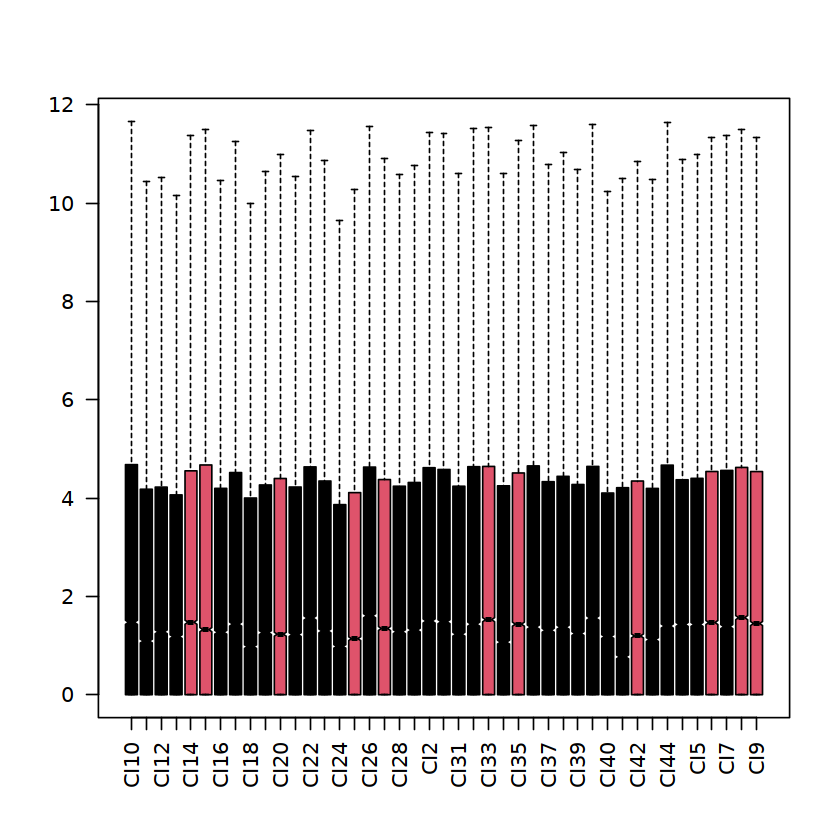

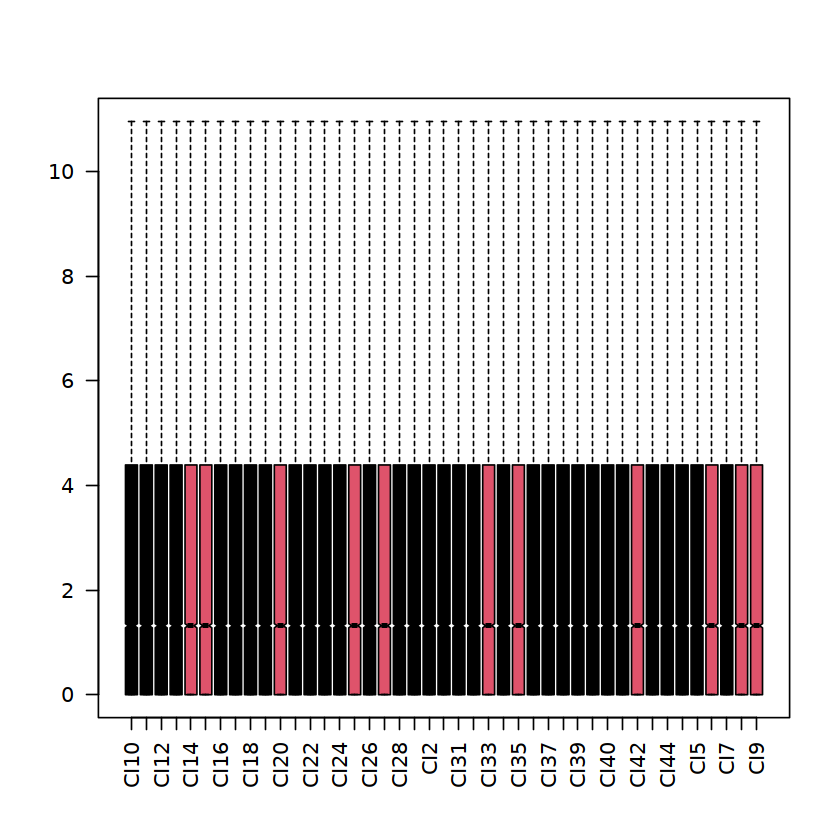

In [18]:
exprSet <- log2(tpms+1)
boxplot(exprSet,outline=FALSE, notch=T,col=group_list, las=2)
library(limma) 
exprSet=normalizeBetweenArrays(exprSet)
boxplot(exprSet,outline=FALSE, notch=T,col=group_list, las=2)

In [19]:
dat <- exprSet
design=model.matrix(~factor( group ))
fit=lmFit(dat,design)
fit=eBayes(fit)
options(digits = 4)
topTable(fit,coef=2,adjust='BH')
bp=function(g){
  library(ggpubr)
  df=data.frame(gene=g,stage=group)
  p <- ggboxplot(df, x = "stage", y = "gene",
                 color = "stage", palette = "jco",
                 add = "jitter")
  #  Add p-value
  p + stat_compare_means()
}
deg=topTable(fit,coef=2,adjust='BH',number = Inf)
head(deg) 

Warning message:
"Zero sample variances detected, have been offset away from zero"


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IGJ,1.8596,7.7525,7.081,1.184e-08,0.0003668,9.7678
GPRC5D,1.1858,1.5865,5.564,1.733e-06,0.0268405,5.0101
TNFRSF17,1.1787,1.6286,5.145,6.815e-06,0.0703840,3.7052
AGPAT4,0.4413,4.3081,5.046,9.393e-06,0.0727541,3.4000
EYA2,0.4392,0.2889,4.873,1.643e-05,0.1017831,2.8687
GLDC,0.6899,0.8273,4.587,4.094e-05,0.1909301,2.0023
HRASLS2,1.2974,1.1460,4.571,4.314e-05,0.1909301,1.9529
C1orf21,0.6043,4.2261,4.243,1.209e-04,0.4395918,0.9791
HPDL,0.5005,0.3918,4.225,1.277e-04,0.4395918,0.9273


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IGJ,1.8596,7.7525,7.081,1.184e-08,0.0003668,9.768
GPRC5D,1.1858,1.5865,5.564,1.733e-06,0.0268405,5.010
TNFRSF17,1.1787,1.6286,5.145,6.815e-06,0.0703840,3.705
AGPAT4,0.4413,4.3081,5.046,9.393e-06,0.0727541,3.400
EYA2,0.4392,0.2889,4.873,1.643e-05,0.1017831,2.869
GLDC,0.6899,0.8273,4.587,4.094e-05,0.1909301,2.002


In [20]:
padj = 0.05
foldChange = 0.5

deg$group = as.factor(ifelse(deg$P.Value < padj & abs(deg$logFC	) > foldChange, 
                                 ifelse(deg$logFC	> foldChange ,'Up','Down'),'NoSignifi'))
table(deg$group)


     Down NoSignifi        Up 
       80     30741       162 

In [ ]:
cg = deg %>% dplyr::filter(group != 'NoSignifi') %>%  rownames()

n=exprSet[cg,group1$V1]

group3 = group1$V2

names(group3) = group1$V1

group4 = as.factor(group3)

library(tinyarray)

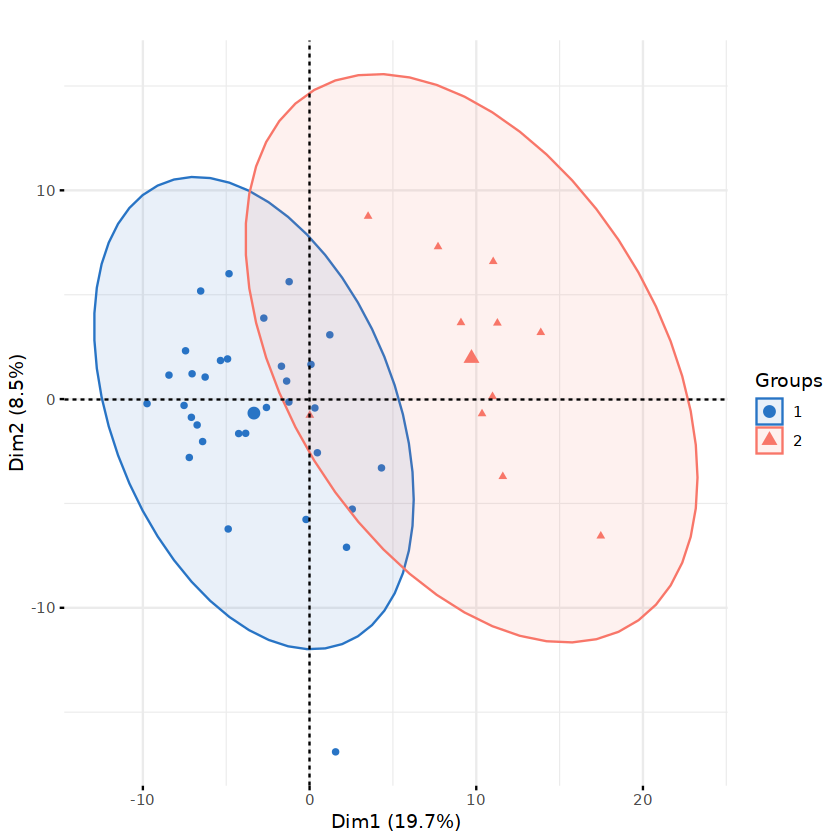

In [27]:
draw_pca(n,group4)

### 差异基因表达热图  这里是subtype2 与subtype1比

In [28]:
data1 = n

In [29]:
library(pheatmap)
forplot = na.omit(data1)
#forplot = forplot[rowSums(forplot) >100,]
#da=log2(data1+1)
dat=t(scale(t(forplot))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]

Warning message:
"package 'pheatmap' was built under R version 4.2.3"


[1] 242  43

In [30]:
library(pheatmap)
annotation_col = data.frame(group)
colnames(annotation_col) = 'group'
row.names(annotation_col) <- colnames(dat)
head(dat,2)

,CI10,CI11,CI12,CI13,CI14,CI15,CI16,CI17,CI18,CI19,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
IGJ,0.3146,0.1407,0.1204,-1.868,1.00618,0.9876,-0.06175,-1.431,-0.1958,0.233535,...,0.77866,1.566,-0.7404,-0.6077,-0.9019,-0.9909,1.119,-1.543,1.179,1.5191
GPRC5D,-1.2145,-0.4630,-0.2503,-1.370,-0.03037,0.3837,0.04577,-1.477,0.3114,-0.006769,...,0.04025,2.000,-0.3015,-0.4027,-0.3838,-0.6787,1.336,-1.348,1.406,-0.2224


In [31]:
options(repr.plot.width = 6,repr.plot.height = 5)

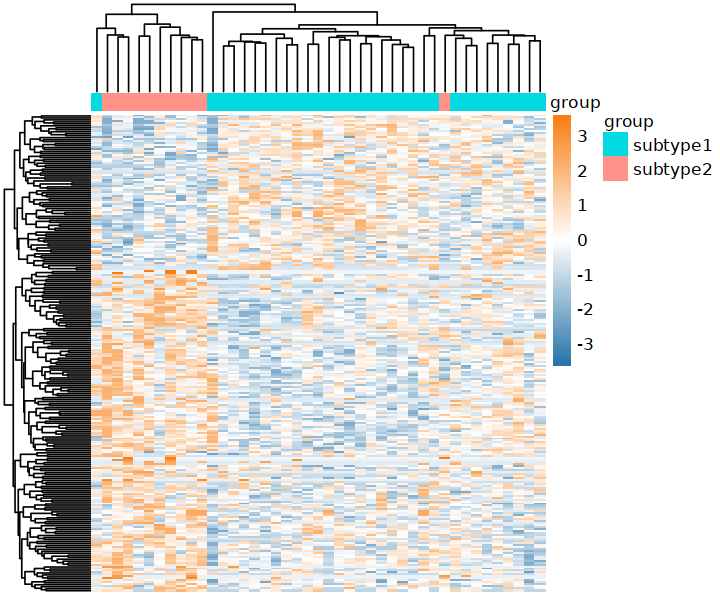

In [32]:
pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         show_rownames=FALSE,
         show_colnames = FALSE,
          scale="row",
        annotation_col = annotation_col,
              #annotation_row = cu.gene,
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#2874A9", "white", "#F87F13"))(100)#换颜色
         # angle_col = 45 #修改横轴坐标名倾斜度
)

In [33]:
table(deg$group)


     Down NoSignifi        Up 
       80     30741       162 

In [34]:
deg$symbol=rownames(deg)
  library(ggplot2)
  library(clusterProfiler)
  library(org.Hs.eg.db)
  df <- bitr(unique(deg$symbol), fromType = "SYMBOL",
             toType = c( "ENTREZID"),
             OrgDb = org.Hs.eg.db)
  head(df)
  DEG=deg
  head(DEG)

  DEG=merge(DEG,df,by.y='SYMBOL',by.x='symbol')
  head(DEG)

  save(DEG,file = 'anno_DEG.Rdata')
  gene_up= DEG[DEG$group == 'Up','ENTREZID'] 
  gene_down=DEG[DEG$group == 'Down','ENTREZID'] 
gene_all= DEG[DEG$group == 'NoSignifi','ENTREZID'] 

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: 'clusterProfiler'


The following object is masked from 'package:stats':

    filter


Loading required package: AnnotationDbi

Warning message:
"package 'AnnotationDbi' was built under R version 4.2.2"
Loading required package: stats4

Loading required package: IRanges

Warning message:
"package 'IRanges' was built under R version 4.2.3"
Loading required package: S4Vectors

Warning message:
"package 'S4Vectors' was built under R version 4.2.3"

Attaching package: 'S4Vectors'


The following object is masked from 'package:clusterProfiler

,SYMBOL,ENTREZID
,<chr>,<chr>
2,GPRC5D,55507
3,TNFRSF17,608
4,AGPAT4,56895
5,EYA2,2139
6,GLDC,2731
8,C1orf21,81563


,logFC,AveExpr,t,P.Value,adj.P.Val,B,group,symbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
IGJ,1.8596,7.7525,7.081,1.184e-08,0.0003668,9.768,Up,IGJ
GPRC5D,1.1858,1.5865,5.564,1.733e-06,0.0268405,5.010,Up,GPRC5D
TNFRSF17,1.1787,1.6286,5.145,6.815e-06,0.0703840,3.705,Up,TNFRSF17
AGPAT4,0.4413,4.3081,5.046,9.393e-06,0.0727541,3.400,NoSignifi,AGPAT4
EYA2,0.4392,0.2889,4.873,1.643e-05,0.1017831,2.869,NoSignifi,EYA2
GLDC,0.6899,0.8273,4.587,4.094e-05,0.1909301,2.002,Up,GLDC


,symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B,group,ENTREZID
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1,A1BG,-0.0339005,0.9541901,-0.42463,0.6733,1,-6.365,NoSignifi,1
2,A1CF,-0.0008315,0.0006188,-0.36502,0.7169,1,-6.389,NoSignifi,29974
3,A2M,0.1008621,0.5541543,1.01830,0.3144,1,-5.943,NoSignifi,2
4,A2ML1,0.0224615,0.0153048,1.53739,0.1318,1,-5.307,NoSignifi,144568
5,A2MP1,-0.0016917,0.0283727,-0.07156,0.9433,1,-6.452,NoSignifi,3
6,A3GALT2,-0.2587654,2.3288983,-0.99671,0.3247,1,-5.965,NoSignifi,127550


In [35]:
enrichKK <- enrichKEGG(gene         =  gene_all,
                     organism     = 'hsa',
                     #universe     = gene_all,
                     pvalueCutoff = 0.5,
                     qvalueCutoff =0.5)
head(enrichKK)[,1:6] 
enrichKK=DOSE::setReadable(enrichKK, OrgDb='org.Hs.eg.db',keyType='ENTREZID')
enrichKK 

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
hsa05205,hsa05205,Proteoglycans in cancer,200/7604,204/8843,1.775e-09,6.052e-07
hsa04820,hsa04820,Cytoskeleton in muscle cells,225/7604,232/8843,1.106e-08,1.683e-06
hsa04934,hsa04934,Cushing syndrome,153/7604,155/8843,1.968e-08,1.683e-06
hsa04010,hsa04010,MAPK signaling pathway,287/7604,300/8843,2.194e-08,1.683e-06
hsa05132,hsa05132,Salmonella infection,242/7604,251/8843,2.467e-08,1.683e-06
hsa04310,hsa04310,Wnt signaling pathway,170/7604,174/8843,9.694e-08,5.510e-06


#
# over-representation test
#
#...@organism 	 hsa 
#...@ontology 	 KEGG 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:21913] "1" "29974" "2" "144568" "3" "127550" "53947" "51146" "8086" ...
#...pvalues adjusted by 'BH' with cutoff <0.5 
#...248 enriched terms found
'data.frame':	248 obs. of  9 variables:
 $ ID         : chr  "hsa05205" "hsa04820" "hsa04934" "hsa04010" ...
 $ Description: chr  "Proteoglycans in cancer" "Cytoskeleton in muscle cells" "Cushing syndrome" "MAPK signaling pathway" ...
 $ GeneRatio  : chr  "200/7604" "225/7604" "153/7604" "287/7604" ...
 $ BgRatio    : chr  "204/8843" "232/8843" "155/8843" "300/8843" ...
 $ pvalue     : num  1.77e-09 1.11e-08 1.97e-08 2.19e-08 2.47e-08 ...
 $ p.adjust   : num  6.05e-07 1.68e-06 1.68e-06 1.68e-06 1.68e-06 ...
 $ qvalue     : num  3.33e-07 9.25e-07 9.25e-07 9.25e-07 9.25e-07 ...
 $ geneID     : chr  "ACTB/ACTG1/AKT1/AKT2/AKT3/ANK1/ANK2/ANK3/ARAF/ARHGEF1/ARHGEF12/BRAF/CAMK2A/CAMK2B/CAMK2D/CAMK2G/CASP3/CAV1/CAV2"| __truncated__ "

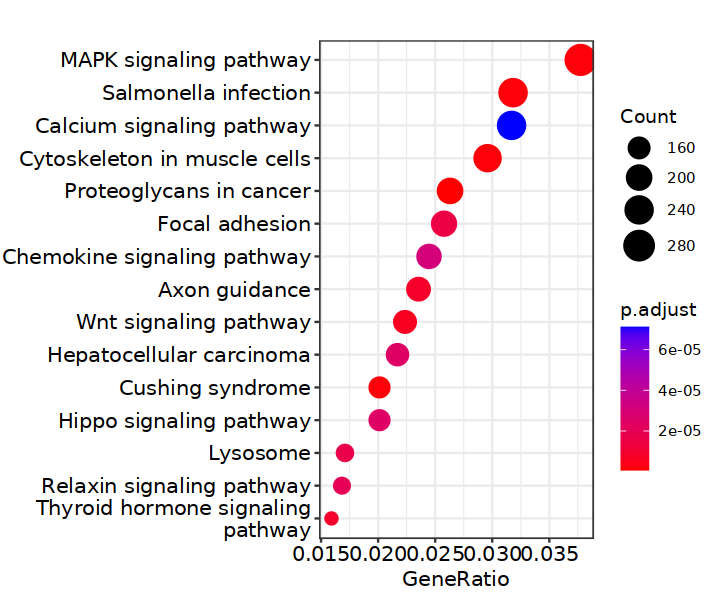

In [36]:
dotplot(enrichKK,showCategory=15)

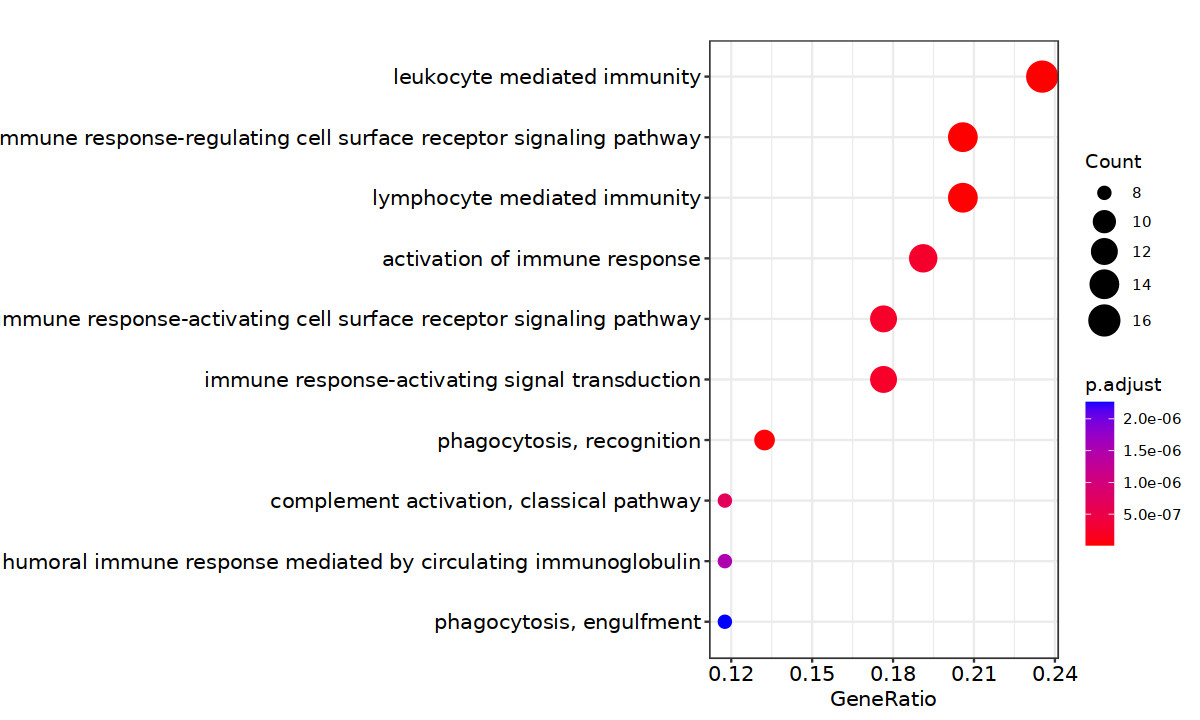

In [37]:
ego_bp_up<-enrichGO(gene       = gene_up,
                 OrgDb      = org.Hs.eg.db,
                 keyType    = 'ENTREZID',
                 ont        = "BP",
                 pAdjustMethod = "BH",
                 pvalueCutoff = 0.01,#0.01
                 qvalueCutoff = 0.05)
options(repr.plot.width = 10,repr.plot.height =6)
dotplot(ego_bp_up,showCategory = 10,label_format=100)

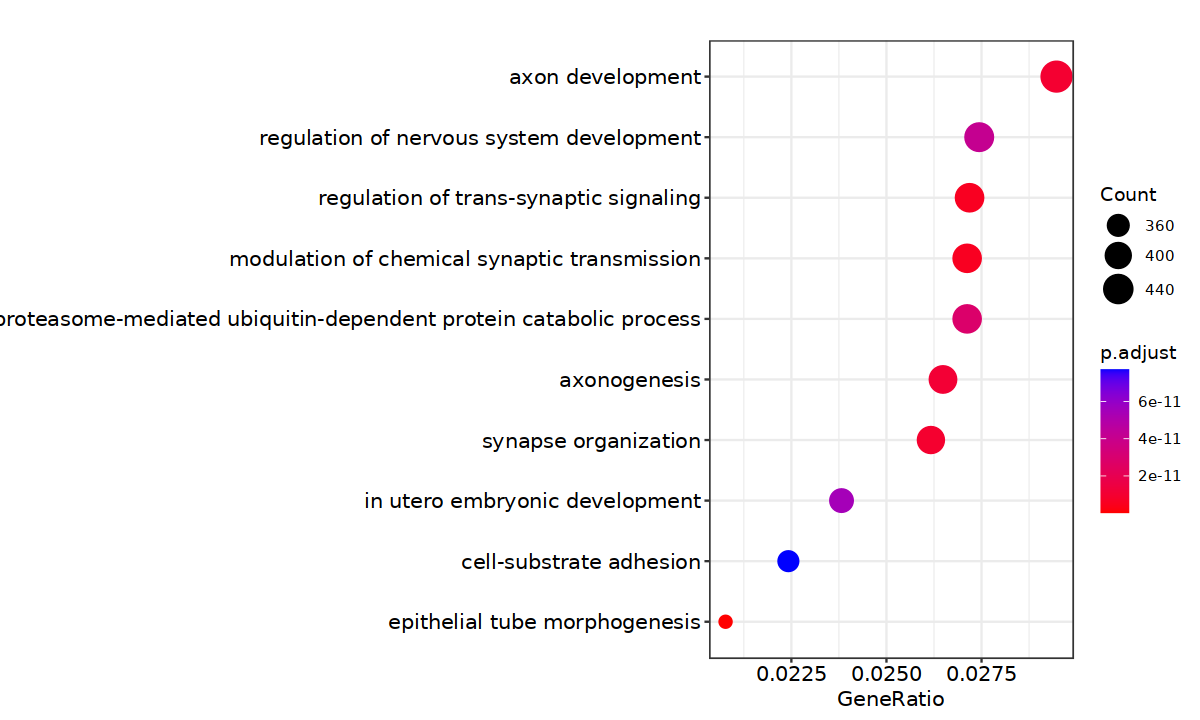

In [38]:
ego_bp_down<-enrichGO(gene       = gene_all,
                 OrgDb      = org.Hs.eg.db,
                 keyType    = 'ENTREZID',
                 ont        = "BP",
                 pAdjustMethod = "BH",
                 pvalueCutoff = 0.05,#0.01
                 qvalueCutoff = 0.5)
options(repr.plot.width = 10,repr.plot.height =6)
dotplot(ego_bp_down,showCategory = 10,label_format=100)

### 两个亚组间模型基因的差异

In [39]:
expr1 = exprSet %>% t() %>%  as.data.frame()

In [110]:
daa1 = cbind(group,expr1) %>% dplyr::select(c('group','FAM200B','BCL2A1','IGJ','TXN'))

In [111]:
require(cowplot)
require(tidyverse)
require(ggplot2)
require(ggsci)
require(ggpubr)

Loading required package: cowplot

Warning message:
"package 'cowplot' was built under R version 4.2.3"
Loading required package: tidyverse

Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.1
v readr     2.1.4     
-- Conflicts ------------------------------------------

In [112]:
mydata<-daa1 %>% 
  ## 基因表达数据gather,gather的范围应调整
  gather(key="gene",value="Expression",FAM200B:TXN) %>% 
  ##
  dplyr::select(group,gene,Expression) 

In [113]:
compare_means( Expression ~ group, data = mydata, method = 't.test',
              group.by = "gene")
# Box plot facetted by "gene"
p <- ggboxplot(mydata, x = "group", y = "Expression",
          color = "group", palette = "jco",
          add = "jitter",
          facet.by = "gene", short.panel.labs = FALSE)
# Use only p.format as label. Remove method name.
#p + stat_compare_means(label =  "p.signif", label.x = 1.5)
p <- ggboxplot(mydata, x = "gene", y = "Expression",
          color = "group", palette = "nejm",
          add = "jitter")

gene,.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
FAM200B,Expression,subtype1,subtype2,6.228e-01,1.0e+00,0.62,ns,T-test
BCL2A1,Expression,subtype1,subtype2,6.776e-01,1.0e+00,0.68,ns,T-test
IGJ,Expression,subtype1,subtype2,3.421e-13,1.4e-12,3.4e-13,****,T-test
TXN,Expression,subtype1,subtype2,6.312e-01,1.0e+00,0.63,ns,T-test


In [114]:
diffgene = as.data.frame(compare_means( Expression ~ group, data = mydata, method = 't.test',
              group.by = "gene"))
diffgene = rownames(diffgene) = diffgene[,1]
options(repr.plot.height = 5,repr.plot.width = 21)
options(repr.plot.width = 7,repr.plot.height = 5)

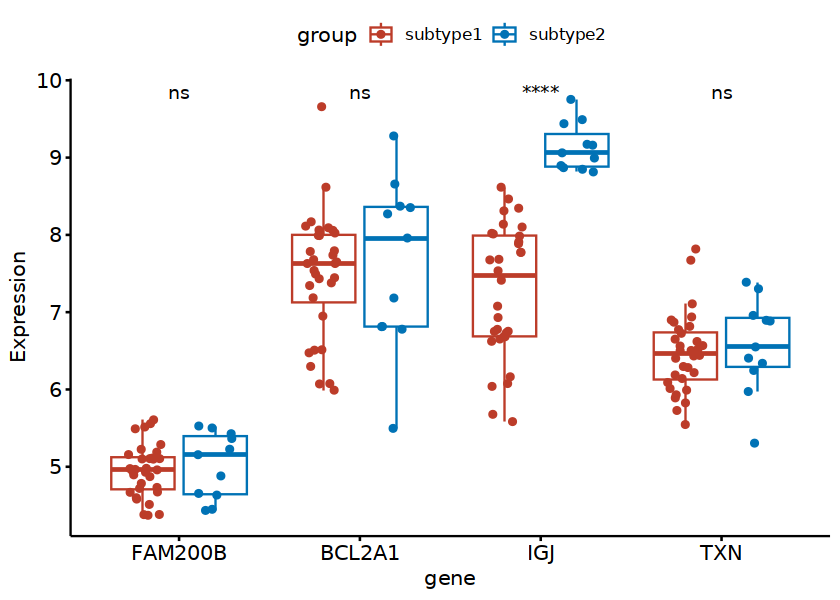

In [115]:
p + stat_compare_means(aes(group = group), label = "p.signif",method = 't.test')

### gsea分析

In [135]:
library(GSEABase)
library(limma) 
library(clusterProfiler)
library(enrichplot)

In [137]:
geneList <- deg$logFC
names(geneList) <- toupper(rownames(deg))
geneList <- sort(geneList,decreasing = T)

In [145]:
geneset <- read.gmt("./kegg.gmt")

gsea_results <- GSEA(
   geneList = geneList,
   TERM2GENE = geneset,
  verbose = F,
  eps=0 )

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.33% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are duplicate gene names, fgsea may produce unexpected results."


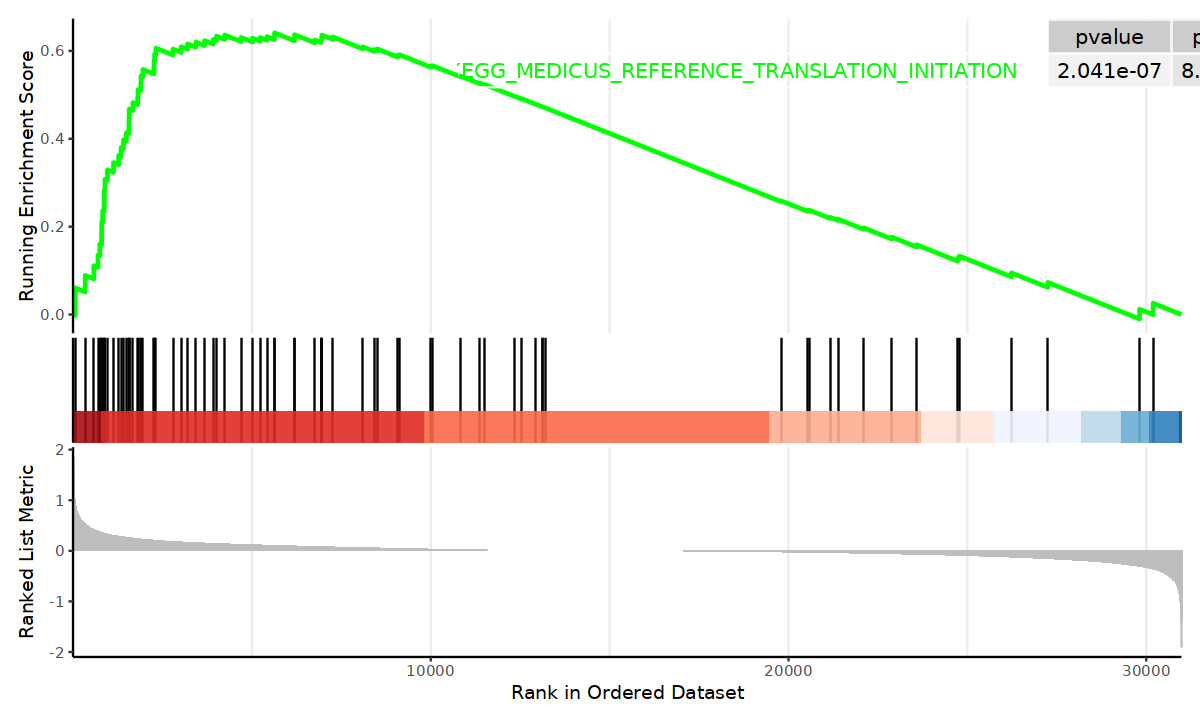

In [150]:
gseaplot2(gsea_results,
          gsea_results@result[["ID"]][1],
         pvalue_table = TRUE)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.33% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are duplicate gene names, fgsea may produce unexpected results."
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
"For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation."


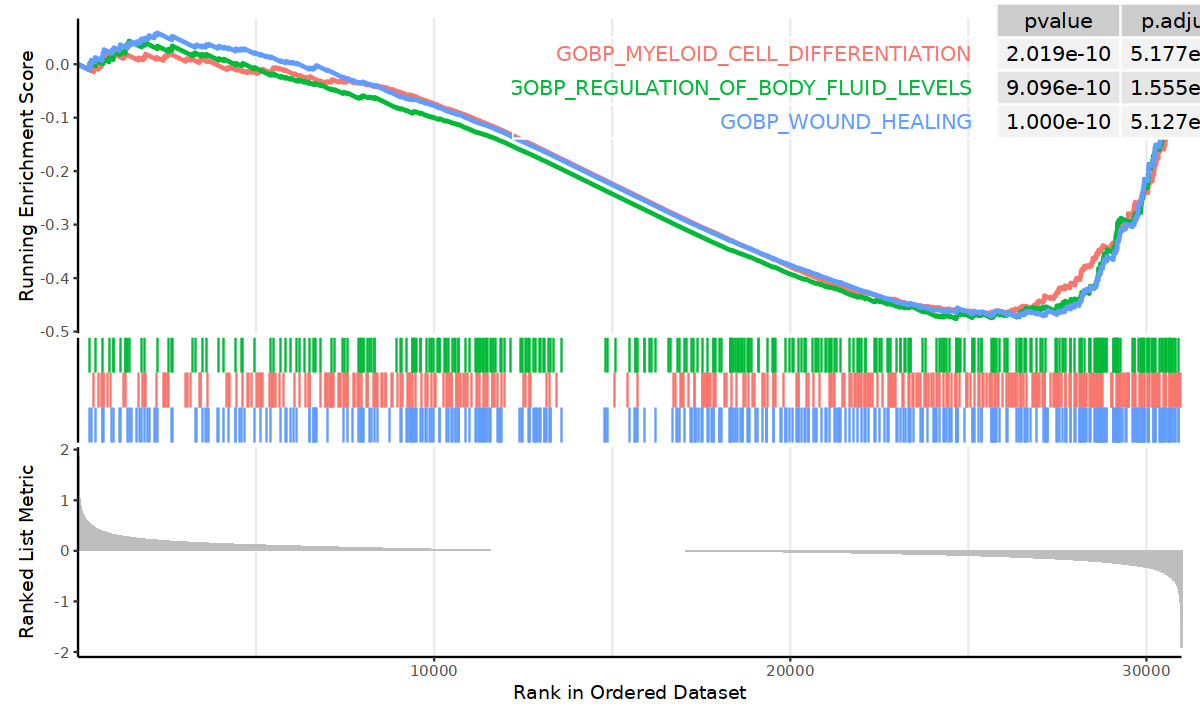

In [141]:
geneset <- read.gmt("./bp.gmt")

gsea_results <- GSEA(
   geneList = geneList,
   TERM2GENE = geneset,
  verbose = F,
  eps=1e-10 )

gseaplot2(gsea_results,
          gsea_results@result[["ID"]][1:3],
         pvalue_table = TRUE)

### 两个亚型的免疫评分差异和免疫检查点差异

In [42]:
ss = expr1 %>% t() %>%  as.data.frame()

In [45]:
save(ss,group,file = 'ss.rda')